In [1]:
from preprocess import create_documents, chunk_documents
from chunk_selection import chunk_select

In [2]:
docs = create_documents("logs/dlt/HPA_partnumber not updated.dlt")
chunks = chunk_documents(docs, chunk_size=4000)

In [3]:
len(docs), len(chunks)

(462, 7)

/home/amos1999/.cache/pypoetry/virtualenvs/logslicer-He69jZ8S-py3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


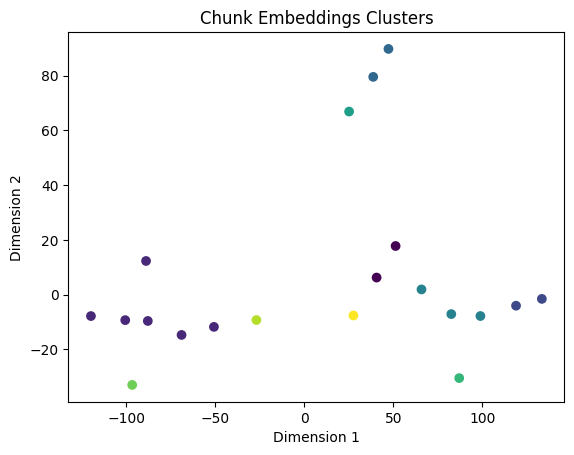

In [3]:
#selected_chunks = chunk_select(chunks, embedding_type='sentran', num_clusters=10)

In [4]:
from models.llms import LLMFactory

llm = LLMFactory.create('azure')


                    engine was transferred to model_kwargs.
                    Please confirm that engine is what you intended.


In [5]:
from utils.templates import SystemPromptMappingTemplate, SystemPromptConbineTemplate
map_prompt_template = SystemPromptMappingTemplate()
combine_prompt_template = SystemPromptConbineTemplate()

In [6]:
from chains import get_summarization_chain

summary_chain = get_summarization_chain(llm=llm,
                                     map_prompt=map_prompt_template,
                                     reduce_prompt=combine_prompt_template,
                                     verbose=True)


output = summary_chain.run(chunks)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are a senior software engineer. Your task is to summarize logs. The logs given to you are divided into blocks following this format:
START [title]
[count] [type]: [payload]
END
You should point out things that are causing errors. You should also provide suggestions or solutions if there are any. You are very
detailed and thorough looking at errors and best practices. The summary should be short and to the point.
"START HPA VMSS CTX0 1060987
31066 error: Cannot get() IMURawAngularVelocity from hal-srs-monitor!, error: -10
31064 error: Cannot get() IMUAngularVelocityCompensated from hal-srs-monitor!, error: -10
30210 error: Cannot get() IMUAngularVelocityDifferentiated from hal-srs-monitor!, error: -10
30205 error: Cannot get() IMURawAcceleration from hal-srs-monitor!, error: -10
30148 error: Cannot get() IMUAccelerationDifferentiated from hal-srs-monitor!, error: -10
30147 e

# 5m 34.5s

In [7]:
print(output)

# Summary 

Our system is experiencing various errors related to different components. These issues include communication problems, service availability, data retrieval, hardware malfunctions, process timeouts, shared memory overflow, missing or incorrect data, and service registration failures. Detailed investigation is required to identify the root cause of these errors and provide the best course of action. 

We are also facing issues with Sensor Monitor Faults in the Low Voltage Battery Monitor HAL, retrieval errors in PDBoxStatus, unsupported events in ERGO, service unavailability, MessagingQNX::DeliverEvent failures, Proxy and IpcStubTransport failures, device and service initialization failures, CarConfig issues, unit conversion errors, disabled GPIOs, and enabling VSCD optimizations.

The logs also indicate problems with service unavailability, device disconnections, failed method invocations, and errors in retrieving parameters. Connectivity checks, investigations into IpcStub

In [36]:
# with open('test.md','w') as f:
#     f.write(output)